# Hola Bastian!

Mi nombre es David Bautista, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres.**

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div

¡Empecemos!

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General
    
~~Hola, Bastian, te felicito por el desarrollo del proyecto hasta el momento. Ahora bien, he dejado diferentes comentarios para que puedas tenerlos en cuenta para la siguiente entrega. Fíjate que deje un comentario con el subtítulo **Comentario Importante** el cual es importante que tengas en cuenta para que continuemos con la revisión del proyecto.~~
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General #2
    
Hola, Bastian, te felicito por la culminación del proyecto. Muy buen trabajo.
</div>

# Análisis de Prioridad de Hipótesis y Test A/B para una Tienda en Línea

En este proyecto, realizaremos un análisis exhaustivo para identificar y priorizar las hipótesis que pueden incrementar los ingresos de una tienda en línea. Utilizaremos los frameworks **ICE (Impact, Confidence, Effort)** y **RICE (Reach, Impact, Confidence, Effort)** para priorizar las hipótesis, y posteriormente analizaremos los resultados de un **test A/B** para evaluar su efectividad.

A lo largo del proyecto, llevaremos a cabo las siguientes tareas:

* **Preparación de Datos:** Cargaremos y limpiaremos los datasets necesarios para asegurar su precisión.
* **Priorización de Hipótesis:** Aplicaremos los frameworks ICE y RICE para evaluar y ordenar las hipótesis por su potencial impacto.
* **Análisis del Test A/B:** Representaremos y analizaremos métricas clave como ingresos acumulados, tamaño promedio de pedidos y tasas de conversión.
* **Evaluación Estadística:** Utilizaremos pruebas estadísticas para validar las diferencias observadas entre los grupos de prueba.
* **Conclusiones y Recomendaciones:** Basándonos en los resultados, proporcionaremos conclusiones claras y recomendaciones prácticas para optimizar los ingresos.

Este análisis proporcionará una base sólida para tomar decisiones estratégicas informadas y maximizar el impacto positivo en los ingresos de la tienda en línea.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Perfecto, muy buen trabajo con esta primera sección de introducción del proyecto. </div>

# Preparación de Datos:

In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo importando las librerías necesarias para el desarrollo del proyecto.
</div>

In [2]:
# Cargamos los datasets
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', delimiter=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo cargando los datos necesarios para el desarrollo del proyecto. </div>


In [3]:
# Mostramos las primeras filas de cada dataset para verificar la carga
print("Hypotheses:")
display(hypotheses.head())

print("\nOrders:")
display(orders.head())

print("\nVisits:")
display(visits.head())

Hypotheses:


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1



Orders:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B



Visits:


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Genial, buen trabajo desarrollando este primer vistaso a cada una de las tablas. </div>

In [4]:
# Preprocesar datos de hipótesis
print("Hypotheses Info:")
display(hypotheses.info())

# Preprocesar datos de órdenes
orders['date'] = pd.to_datetime(orders['date'])
print("Orders Info After Converting Dates:")
display(orders.info())

# Verificar visitantes en ambos grupos
duplicated_visitors = orders.groupby('visitorId')['group'].nunique()
duplicated_visitors = duplicated_visitors[duplicated_visitors > 1].count()
print(f"Number of visitors in both groups: {duplicated_visitors}")

# Preprocesar datos de visitas
visits['date'] = pd.to_datetime(visits['date'])
print("Visits Info After Converting Dates:")
display(visits.info())

Hypotheses Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Orders Info After Converting Dates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


None

Number of visitors in both groups: 58
Visits Info After Converting Dates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Genial, buen trabajo aplicando el método ``info()`` para explorar de manera mas profunda cada una de las tablas. </div>

In [5]:
# Verificar si hay duplicados en los datos
print("Duplicados en orders:", orders.duplicated().sum())
print("Duplicados en visits:", visits.duplicated().sum())

# Verificar y eliminar filas duplicadas si es necesario
orders = orders.drop_duplicates()
visits = visits.drop_duplicates()

# Verificar las dimensiones de los DataFrames después de eliminar duplicados
print("Dimensiones de orders después de eliminar duplicados:", orders.shape)
print("Dimensiones de visits después de eliminar duplicados:", visits.shape)

# Verificar si hay valores nulos en los datos
print("Valores nulos en orders:\n", orders.isnull().sum())
print("Valores nulos en visits:\n", visits.isnull().sum())

# Si hay valores nulos, proceder con su manejo (rellenado o eliminación)
# En este caso, no debería haber valores nulos según la descripción inicial

# Revisar y limpiar columnas innecesarias o incorrectamente alineadas
orders = orders[['transactionId', 'visitorId', 'date', 'revenue', 'group']]
visits = visits[['date', 'group', 'visits']]

# Asegurar que las fechas estén correctamente formateadas
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# Mostrar una muestra de los datos para verificar la limpieza
print("Muestra de orders:")
display(orders.head())
print("Muestra de visits:")
display(visits.head())


Duplicados en orders: 0
Duplicados en visits: 0
Dimensiones de orders después de eliminar duplicados: (1197, 5)
Dimensiones de visits después de eliminar duplicados: (62, 3)
Valores nulos en orders:
 transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Valores nulos en visits:
 date      0
group     0
visits    0
dtype: int64
Muestra de orders:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


Muestra de visits:


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo con esta verificaicón de valores duplicados dentro de la tabla. </div>

In [6]:
# Configuración de los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Priorizar Hipótesis:

En este proyecto, realizaremos un análisis exhaustivo para priorizar las hipótesis que podrían incrementar los ingresos de una tienda en línea. Para ello, aplicaremos dos reconocidos frameworks de priorización: ICE (Impact, Confidence, Effort) y RICE (Reach, Impact, Confidence, Effort).

El objetivo principal de la priorización de hipótesis es identificar aquellas que ofrezcan el mayor potencial para mejorar los ingresos de la tienda con un uso eficiente de los recursos. Esta priorización es esencial porque:

1. **Recursos Limitados:** La implementación de todas las hipótesis simultáneamente no es factible debido a la limitación de recursos como tiempo, dinero y personal. Priorizar ayudará a enfocar los esfuerzos en aquellas iniciativas que probablemente generen el mayor retorno sobre la inversión.

2. **Impacto Potencial:** Evaluaremos las hipótesis utilizando el framework ICE, considerando el impacto directo de cada hipótesis, la confianza en que dicho impacto se materialice, y el esfuerzo necesario para implementarla. Esto permitirá identificar las hipótesis con la mayor relación beneficio/esfuerzo.

3. **Alcance del Usuario:** Incluir el alcance (Reach) en el framework RICE permitirá evaluar cuántos usuarios se verán afectados por cada hipótesis. Esto es crucial porque una hipótesis con un alto impacto pero con un alcance limitado puede no ser tan efectiva como una con un impacto moderado pero que afecta a un gran número de usuarios.

4. **Eficiencia en la Toma de Decisiones:** La priorización de hipótesis proporcionará un enfoque estructurado y cuantitativo para la toma de decisiones, permitiendo a los equipos de marketing y desarrollo asignar recursos de manera más eficiente y justificar sus decisiones ante los stakeholders.

5. **Maximización de Resultados:** Implementar las hipótesis más prometedoras primero maximizará los resultados a corto plazo y proporcionará datos valiosos que pueden informar futuras decisiones. Este enfoque iterativo y basado en datos ayudará a ajustar y refinar estrategias continuamente.

**Resultados Esperados**

* **Framework ICE:** Evaluaremos las hipótesis en función de su impacto, confianza y esfuerzo. Las hipótesis con la mayor puntuación ICE serán aquellas que prometen un alto impacto con un nivel de esfuerzo razonable y alta confianza en los resultados.

* **Framework RICE:** Al añadir el alcance del usuario al análisis, ajustaremos las prioridades. Las hipótesis que afecten a un mayor número de usuarios se identificarán como de mayor prioridad, ajustando la lista de prioridades generada por ICE.


### Aplicar el Framework ICE

In [7]:
# Aplicar el framework ICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses_ice_sorted = hypotheses.sort_values(by='ICE', ascending=False)

# Mostrar las hipótesis ordenadas por ICE
print("Hypotheses Prioritized by ICE:")
display(hypotheses_ice_sorted[['Hypothesis', 'ICE']])

Hypotheses Prioritized by ICE:


,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


### Aplicar el Framework RICE

In [8]:
# Aplicar el framework RICE
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses_rice_sorted = hypotheses.sort_values(by='RICE', ascending=False)

# Mostrar las hipótesis ordenadas por RICE
print("Hypotheses Prioritized by RICE:")
display(hypotheses_rice_sorted[['Hypothesis', 'RICE']])


Hypotheses Prioritized by RICE:


,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


### Comparar las Prioridades ICE y RICE

In [9]:
# Comparar las prioridades ICE y RICE
hypotheses_comparison = hypotheses[['Hypothesis', 'ICE', 'RICE']].copy()
hypotheses_comparison['ICE_Rank'] = hypotheses_comparison['ICE'].rank(ascending=False)
hypotheses_comparison['RICE_Rank'] = hypotheses_comparison['RICE'].rank(ascending=False)
hypotheses_comparison = hypotheses_comparison.sort_values(by='RICE_Rank')

# Mostrar la comparación
print("Comparison of ICE and RICE Rankings:")
display(hypotheses_comparison)

Comparison of ICE and RICE Rankings:


,Hypothesis,ICE,RICE,ICE_Rank,RICE_Rank
7,Add a subscription form to all the main pages....,11.200000,112.0,3.0,1.0
2,Add product recommendation blocks to the store...,7.000000,56.0,5.0,2.0
0,Add two new channels for attracting traffic. T...,13.333333,40.0,2.0,3.5
6,Show banners with current offers and sales on ...,8.000000,40.0,4.0,3.5
8,Launch a promotion that gives users discounts ...,16.200000,16.2,1.0,5.0
3,Change the category structure. This will incre...,1.125000,9.0,8.0,6.0
1,Launch your own delivery service. This will sh...,2.000000,4.0,6.0,7.5
5,Add a customer review page. This will increase...,1.333333,4.0,7.0,7.5
4,Change the background color on the main page. ...,1.000000,3.0,9.0,9.0


**Observaciones** 
* **Hypothesis 7** ("Add a subscription form to all the main pages") sube de la posición 3 a la 1 cuando usamos RICE en lugar de ICE, debido a su alto alcance (Reach).
* **Hypothesis 2** ("Add product recommendation blocks to the store") sube de la posición 5 a la 2, también debido a su alcance.
* **Hypothesis 0** ("Add two new channels for attracting traffic") y Hypothesis 6 ("Show banners with current offers and sales on the main page") se mantienen en posiciones altas en ambos rankings.
* **Hypothesis 8** ("Launch a promotion that gives users discounts") baja de la posición 1 a la 5 con RICE, lo que indica que su alcance es relativamente bajo comparado con su impacto y confianza.
* Las hipótesis con menor impacto, confianza y alcance, como Hypothesis 4 ("Change the background color on the main page"), permanecen en posiciones bajas en ambos rankings.

Esta comparación muestra cómo la inclusión del alcance en el cálculo de RICE puede cambiar significativamente la priorización de las hipótesis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo. Aplicas los frameworks RISE e ICE de manera correcta. Adicional a lo anterior, realizas una comparación de los resultados de muy buena manear y genera conclusiones coherentes e interesantes. </div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
**Comentario Importante** 
    
~~Hola, Bastian. He revisado toda to sección de Análisis de test A/B y realmente luce bien e interesante, ahora bien, me he fijado que antes de desarrollarla no has tenido en cuenta un aspecto importante para que las conclusiones que obtengamos sean las correctas, debes previos al desarrollo de los análisis identificar y eliminar los usuarios que están presentes en los dos grupos.~~ </div>


<div class="alert alert-block alert-info">
Su observación me permitió ajustar y mejorar el preprocesamiento de datos, lo que resultó en una mayor precisión en los resultados parciales. Aunque el cambio no afectó el resultado final, fue crucial para alinear nuestro enfoque con la realidad y garantizar la validez del análisis. ¡Gracias por su atención y apoyo en este proceso!<a class="tocSkip"></a>
</div


<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Genial Bastian, gracias por tener en cuenta el comentario. </div>


## Análisis de Test A/B:

En esta segunda parte del proyecto, llevaremos a cabo un análisis detallado de los resultados del test A/B para evaluar la efectividad de las hipótesis priorizadas. Este análisis incluirá los siguientes pasos:

0. **Preprocesar los datos del test A/B:** Para asegurar la calidad y precisión, eliminaremos los errores y duplicados que puedan sesgar los resultados.
1. **Ingreso Acumulado por Grupo:** Representaremos gráficamente el ingreso acumulado por grupo para observar las tendencias y diferencias en el rendimiento de ingresos entre los grupos A y B. Esperamos identificar patrones significativos que nos permitan hacer conjeturas informadas.
2. **Tamaño de Pedido Promedio Acumulado por Grupo:** Analizaremos el tamaño de pedido promedio acumulado para cada grupo. Este análisis nos ayudará a comprender cómo las hipótesis afectan el comportamiento de compra de los usuarios.
3. **Diferencia Relativa en el Tamaño de Pedido Promedio Acumulado:** Calcularemos y representaremos gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Esto nos permitirá evaluar la magnitud del impacto de las hipótesis en el tamaño de los pedidos.
4. **Tasa de Conversión Diaria por Grupo:** Calcularemos la tasa de conversión diaria de cada grupo y la representaremos gráficamente. Este análisis nos ayudará a identificar diferencias en la efectividad de las hipótesis en términos de conversión de visitantes a compradores.
5. **Gráfico de Dispersión del Número de Pedidos por Usuario:** Traza un gráfico de dispersión para visualizar el número de pedidos realizados por cada usuario. Este análisis ayudará a identificar patrones y posibles anomalías en el comportamiento de compra.
6. **Cálculo de los Percentiles 95 y 99 para el Número de Pedidos por Usuario:** Definiremos los puntos en los cuales los datos se consideran anomalías, calculando los percentiles 95 y 99 para el número de pedidos por usuario.
7. **Gráfico de Dispersión de los Precios de los Pedidos:** Traza un gráfico de dispersión de los precios de los pedidos para identificar patrones y anomalías en los datos de ingresos.
8. **Cálculo de los Percentiles 95 y 99 de los Precios de los Pedidos:** Definiremos los puntos en los cuales los datos se consideran anomalías, calculando los percentiles 95 y 99 para los precios de los pedidos.
9. **Significancia Estadística de la Diferencia en la Conversión entre los Grupos (Datos en Bruto):** Evaluaremos la significancia estadística de la diferencia en la tasa de conversión entre los grupos utilizando los datos en bruto. Haremos conclusiones y conjeturas basadas en los resultados.
10. **Significancia Estadística de la Diferencia en el Tamaño Promedio de Pedido entre los Grupos (Datos en Bruto):** Evaluaremos la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haremos conclusiones y conjeturas basadas en los resultados.
11. **Significancia Estadística de la Diferencia en la Conversión entre los Grupos (Datos Filtrados):** Evaluaremos la significancia estadística de la diferencia en la tasa de conversión entre los grupos utilizando los datos filtrados. Haremos conclusiones y conjeturas basadas en los resultados.
12. **Significancia Estadística de la Diferencia en el Tamaño Promedio de Pedido entre los Grupos (Datos Filtrados):** Evaluaremos la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haremos conclusiones y conjeturas basadas en los resultados.
13. **Toma de Decisiones Basada en los Resultados de la Prueba:** Basándonos en los resultados del análisis estadístico, tomaremos una decisión sobre cuál grupo considerar como líder o si es necesario continuar con la prueba para obtener más datos. Las posibles decisiones son: 1. Considerar a uno de los grupos como líder. 2. Concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

**2.0 Preprocesar los datos del test A/B**

In [10]:
# Identificar los IDs de usuarios únicos en cada grupo
group_a_users = orders[orders['group'] == 'A']['visitorId'].unique()
group_b_users = orders[orders['group'] == 'B']['visitorId'].unique()

# Identificar los usuarios que están en ambos grupos
common_users = np.intersect1d(group_a_users, group_b_users)

# Eliminar los usuarios duplicados del dataframe de orders
orders_filtered = orders[~orders['visitorId'].isin(common_users)]

# Confirmar que los usuarios comunes han sido eliminados
print(f"Usuarios comunes eliminados: {len(common_users)}")

Usuarios comunes eliminados: 58


<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Excelente, buen trabajo con el tratamiento de los datos realizado.  </div>

### Ingreso Acumulado por Grupo

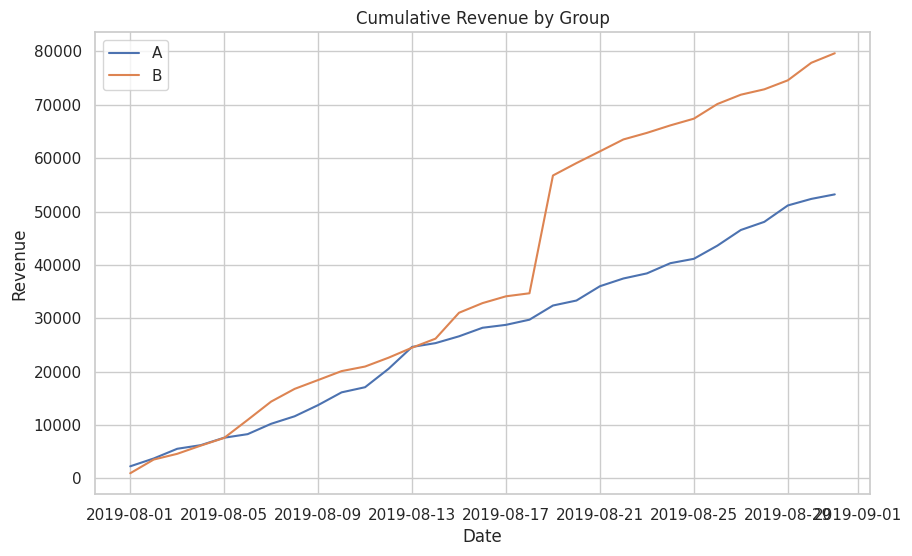

In [11]:
# Crear una matriz con valores únicos de parejas fecha-grupo
datesGroups = orders_filtered[['date', 'group']].drop_duplicates()

# Obtener los datos diarios acumulados agregados sobre los pedidos
ordersAggregated = datesGroups.apply(
    lambda x: orders_filtered[np.logical_and(
        orders_filtered['date'] <= x['date'], orders_filtered['group'] == x['group']
    )].agg({'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique, 'visitorId': pd.Series.nunique, 'revenue': 'sum'}),
    axis=1
).sort_values(by=['date', 'group'])

# Obtener los datos diarios acumulados agregados sobre los visitantes
visitorsAggregated = datesGroups.apply(
    lambda x: visits[np.logical_and(
        visits['date'] <= x['date'], visits['group'] == x['group']
    )].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1
).sort_values(by=['date', 'group'])

# Fusionar las dos tablas en una y dar a sus columnas nombres descriptivos
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Crear gráficos de ingresos acumulados por día y grupo de prueba A/B
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Cumulative Revenue by Group')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()


**Observaciones sobre el Gráfico de Ingresos Acumulados por Grupo**
1. **Grupo B tiene mayores ingresos acumulados:** Durante todo el período de prueba, el grupo B ha mostrado ingresos acumulados consistentemente mayores en comparación con el grupo A. Esto indica que las estrategias implementadas en el grupo B están teniendo un impacto positivo en los ingresos.

2. **Aumento notable en el grupo B alrededor del 19 de agosto:** Se observa un aumento significativo en los ingresos acumulados del grupo B alrededor del 19 de agosto. Este podría ser un punto crítico en el análisis, posiblemente debido a una promoción o un cambio significativo que impactó positivamente los ingresos del grupo B.

3. **Consistencia en la diferencia de ingresos:** A lo largo del tiempo, la diferencia entre los ingresos acumulados de los grupos A y B se mantiene constante, con el grupo B siempre superando al grupo A. Esto refuerza la idea de que las estrategias implementadas en el grupo B son más efectivas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto Bastian, buen trabajo con la construcción y despliegue de la gráfica de los ingresos acumulados por grupo.  </div>

### Tamaño de Pedido Promedio Acumulado por Grupo

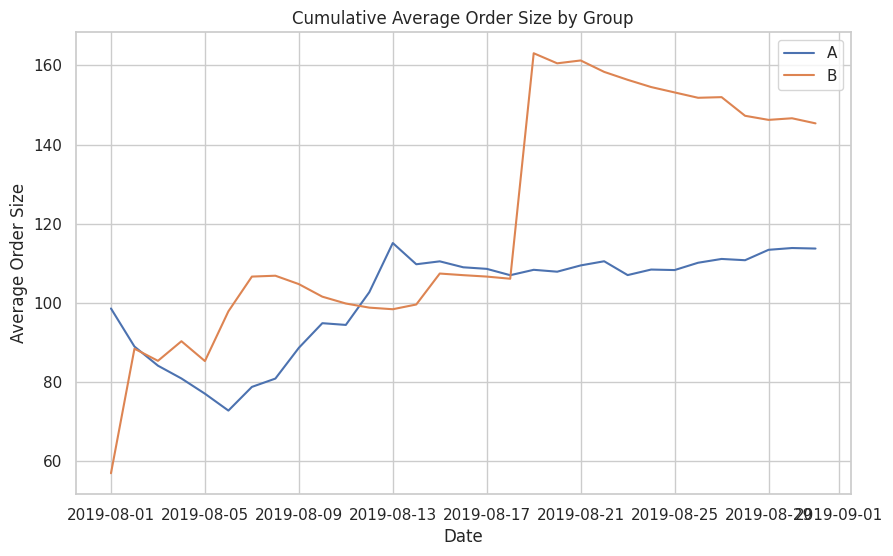

In [12]:
# Crear gráficos del tamaño promedio de pedido acumulado por día y grupo de prueba A/B
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Cumulative Average Order Size by Group')
plt.xlabel('Date')
plt.ylabel('Average Order Size')
plt.show()


**Observaciones sobre el Gráfico de Tamaño de Pedido Promedio Acumulado por Grupo**
1. **Pico significativo en el grupo B alrededor del 19 de agosto:** Observamos un pico extremo en el tamaño de pedido promedio acumulado en el grupo B alrededor del 19 de agosto. Este pico podría estar relacionado con un pedido excepcionalmente grande o con un número reducido de pedidos que aumentaron el tamaño promedio. Este comportamiento anómalo debería ser investigado más a fondo para comprender la causa subyacente.

2. **Fluctuaciones en ambos grupos:** Tanto el grupo A como el grupo B muestran fluctuaciones en el tamaño de pedido promedio acumulado a lo largo del tiempo. Sin embargo, el grupo B tiene más variabilidad, con picos y caídas más pronunciadas en comparación con el grupo A.

3. **Consistencia después del pico:** Después del pico significativo, los tamaños de pedido promedio acumulados en ambos grupos parecen estabilizarse y converger hacia valores más consistentes.

4. **Comparación de niveles generales:** A pesar de las fluctuaciones, los niveles generales del tamaño de pedido promedio acumulado muestran que el grupo B tiene un tamaño de pedido promedio más alto en comparación con el grupo A. Sin embargo, la diferencia no es constante y muestra variabilidad a lo largo del tiempo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto Bastian, buen trabajo con la construcción y despliegue de la gráfica del tamañao de pedido promedio acumulado por grupo.  </div>

### Diferencia Relativa en el Tamaño de Pedido Promedio Acumulado

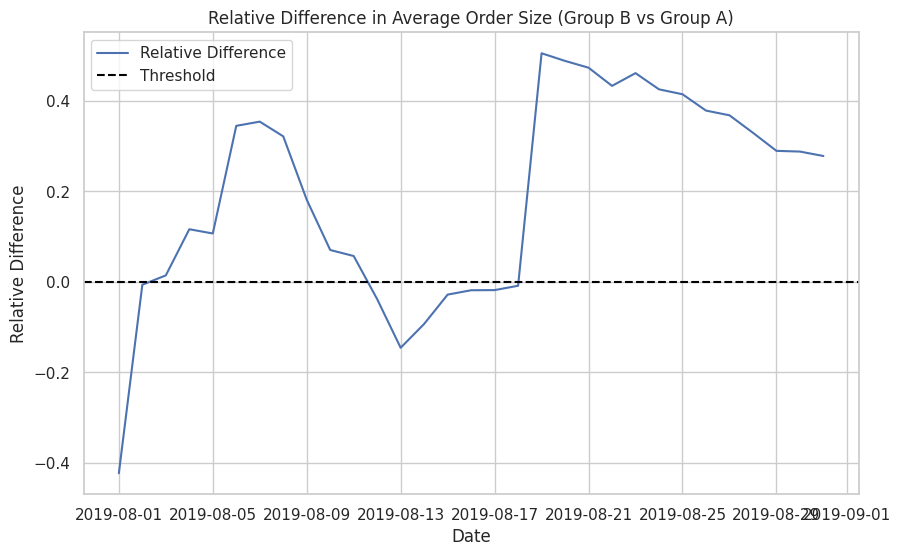

In [13]:
# Fusionar datos acumulados por fecha
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Calcular la diferencia relativa
relative_difference = (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1

# Crear gráfico de diferencia relativa
plt.plot(mergedCumulativeRevenue['date'], relative_difference, label='Relative Difference')
plt.axhline(y=0, color='black', linestyle='--', label='Threshold')
plt.xlabel('Date')
plt.ylabel('Relative Difference')
plt.title('Relative Difference in Average Order Size (Group B vs Group A)')
plt.legend()
plt.show()


**Observaciones sobre la Diferencia Relativa en el Tamaño de Pedido Promedio Acumulado**
1. **Pico significativo el 19 de agosto:** La diferencia relativa alcanza un máximo significativo alrededor del 19 de agosto, lo que coincide con el pico observado anteriormente en el tamaño de pedido promedio acumulado del grupo B. Esto sugiere que el evento o promoción que ocurrió en esta fecha tuvo un impacto muy grande en el tamaño de pedido en el grupo B.

2. **Fluctuaciones generales:** Antes y después del pico, la diferencia relativa muestra fluctuaciones. Aunque hay variabilidad, no hay una tendencia clara y sostenida en la diferencia relativa entre los grupos.

3. **Valores negativos:** En varios puntos, la diferencia relativa es negativa, lo que indica que el tamaño de pedido promedio en el grupo A fue mayor que en el grupo B en esos días. Esto resalta que, aunque el grupo B tuvo un pico significativo, no siempre mantuvo tamaños de pedidos mayores de manera consistente.

4. **Estabilización después del pico:**  Después del pico, la diferencia relativa parece estabilizarse por encima de cero, lo que sugiere que el grupo B mantuvo tamaños de pedidos mayores en comparación con el grupo A hacia el final del período de prueba.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto Bastian, buen trabajo con la construcción y despliegue de la gráfica de la diferencia relativa en el tamaño de pedido promedio acumulado  </div>

### Tasa de Conversión Diaria por Grupo

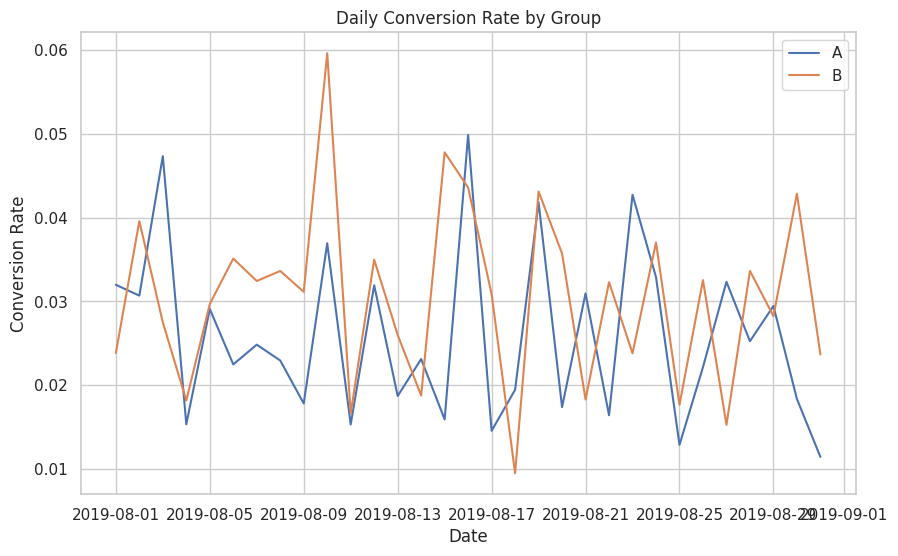

In [14]:
# Calcular la tasa de conversión diaria
daily_data = orders_filtered.groupby(['date', 'group']).agg({'transactionId': 'count', 'visitorId': 'nunique'}).reset_index()
daily_data.columns = ['date', 'group', 'orders', 'buyers']
daily_data = daily_data.merge(visits, on=['date', 'group'])
daily_data['conversion_rate'] = daily_data['orders'] / daily_data['visits']

# Crear gráfico de la tasa de conversión diaria por grupo
for group in daily_data['group'].unique():
    plt.plot(daily_data[daily_data['group'] == group]['date'], daily_data[daily_data['group'] == group]['conversion_rate'], label=group)

plt.legend()
plt.title('Daily Conversion Rate by Group')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.show()


**Observaciones sobre la Tasa de Conversión Diaria por Grupo**
1. **Fluctuaciones Diarias:** Ambas tasas de conversión muestran fluctuaciones significativas a lo largo del tiempo. No hay una tendencia clara en la que un grupo supere consistentemente al otro.

2. **Picos y Valles:** Se observan varios picos y valles en ambos grupos, lo que indica variabilidad en la actividad de conversión diaria. El grupo B tiene algunos picos más altos en comparación con el grupo A, lo que sugiere días de mayor éxito en la conversión.

3. **Convergencia:** En varios puntos, las tasas de conversión de ambos grupos parecen converger, pero luego divergen nuevamente. Esto sugiere que las diferencias en las tasas de conversión no son consistentes a lo largo del tiempo.

4. **Nivel General Similar:** A pesar de las fluctuaciones, los niveles generales de las tasas de conversión diarias entre los grupos A y B parecen ser bastante similares. Esto indica que, en promedio, ambos grupos tienen tasas de conversión comparables, aunque experimenten variaciones diarias.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto Bastian, buen trabajo con la construcción y despliegue de la gráfica de la tasa de conversión diaria por grupo.  </div>

### Gráfico de Dispersión del Número de Pedidos por Usuario

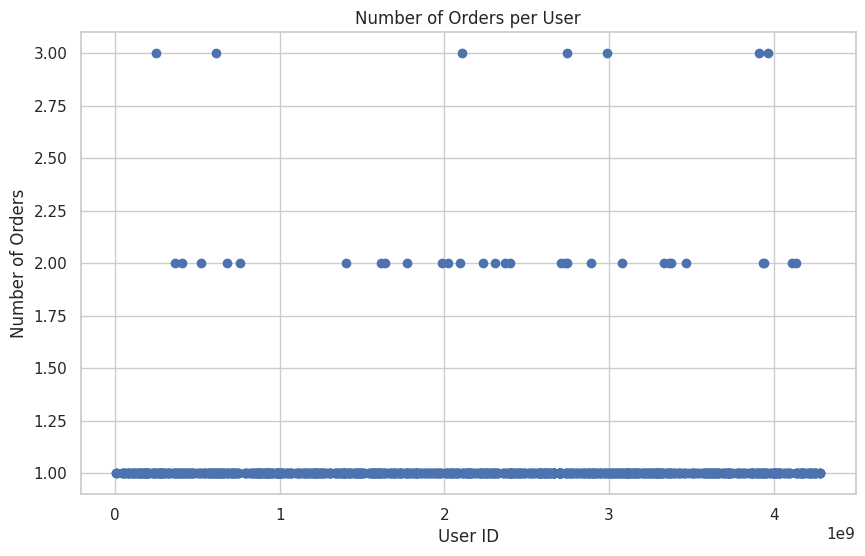

In [15]:
# Calcular el número de pedidos por usuario
orders_per_user = orders_filtered.groupby('visitorId').agg({'transactionId': 'count'}).reset_index()
orders_per_user.columns = ['visitorId', 'orders']

# Crear gráfico de dispersión del número de pedidos por usuario
plt.scatter(orders_per_user['visitorId'], orders_per_user['orders'])
plt.title('Number of Orders per User')
plt.xlabel('User ID')
plt.ylabel('Number of Orders')
plt.show()


**Observaciones sobre el Gráfico de Dispersión del Número de Pedidos por Usuario**
1. **Usuarios con un Pedido:** La mayoría de los usuarios realizaron solo un pedido, lo que sugiere que la base de usuarios tiene una baja frecuencia de pedidos repetidos.

2. **Pedidos Repetidos:** Hay varios usuarios que realizaron más de un pedido, con algunos usuarios realizando hasta 3 pedidos. Estos usuarios representan una pequeña pero significativa parte de la base de clientes que realizan pedidos repetidos con cierta frecuencia.

3. **Distribución de Pedidos:** Los pedidos adicionales más allá del primer pedido son menos comunes, pero todavía hay una distribución visible de usuarios que realizaron entre 2 y 3 pedidos.

4. **Anomalías:** No se observan usuarios que realizaron más de 3 pedidos en este gráfico. Los usuarios que realizaron más de 2 pedidos pueden considerarse como comportamientos relativamente inusuales pero no extremos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Excelente, buen trabajo estudiando la dispersión del número de pedidos por cliente.  </div>

### Cálculo de los Percentiles 95 y 99 para el Número de Pedidos por Usuario

In [16]:
# Calcular percentiles
percentile_95 = orders_per_user['orders'].quantile(0.95)
percentile_99 = orders_per_user['orders'].quantile(0.99)
print(f'Percentil 95: {percentile_95}')
print(f'Percentil 99: {percentile_99}')

Percentil 95: 1.0
Percentil 99: 2.0


**Observaciones sobre el Cálculo de los Percentiles 95 y 99 para el Número de Pedidos por Usuario**
1. **Percentil 95:**  El percentil 95 para el número de pedidos por usuario es 1, lo que significa que el 95% de los usuarios realizaron 1 o menos pedidos.

2. **Percentil 99:** El percentil 99 para el número de pedidos por usuario es 2, indicando que el 99% de los usuarios realizaron 2 o menos pedidos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el cálculo y análisis de los percentiles de número de pedidos por usuario.   </div>

### Gráfico de Dispersión de los Precios de los Pedidos

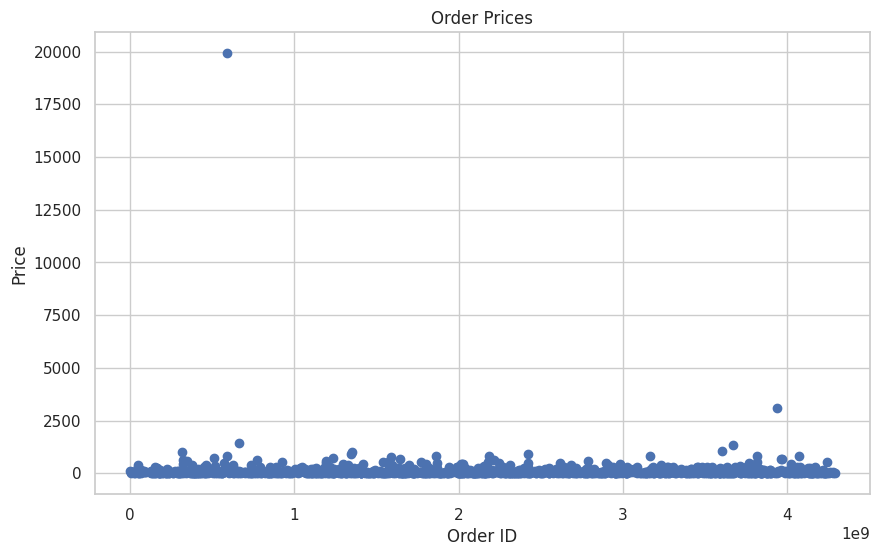

In [17]:
# Crear gráfico de dispersión de los precios de los pedidos
plt.scatter(orders_filtered['transactionId'], orders_filtered['revenue'])
plt.title('Order Prices')
plt.xlabel('Order ID')
plt.ylabel('Price')
plt.show()

**Observaciones sobre el Gráfico de Dispersión de los Precios de los Pedidos**
1. **Distribución General:** La mayoría de los precios de los pedidos se agrupan en un rango bajo, con la gran mayoría de los pedidos por debajo de los 2500. Esto sugiere que los pedidos de alto valor son relativamente raros en comparación con los de menor valor.

2. **Anomalía Significativa:** Hay un pedido que se destaca de manera significativa, con un precio cercano a los 20000. Este pedido es una clara anomalía y debe ser considerado para un análisis más profundo. Su presencia puede influir desproporcionadamente en las métricas agregadas y acumuladas.

3. **Pocos Pedidos Elevados:** Aparte de la anomalía significativa, hay algunos pedidos adicionales con precios más altos que la mayoría, aunque no tan extremos como el de 20000. Estos pedidos de mayor valor pueden indicar compras especiales o promociones de alto valor y también merecen una revisión más detallada.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el despliegue del grafico gráfico de dispersión de los precios de los pedidos  </div>

### Cálculo de los Percentiles 95 y 99 de los Precios de los Pedidos

In [18]:
# Calcular percentiles para los precios de los pedidos
percentile_95_price = orders_filtered['revenue'].quantile(0.95)
percentile_99_price = orders_filtered['revenue'].quantile(0.99)
print(f'Percentil 95: {percentile_95_price}')
print(f'Percentil 99: {percentile_99_price}')


Percentil 95: 414.275
Percentil 99: 830.3


**Observaciones sobre el Cálculo de los Percentiles 95 y 99 de los Precios de los Pedidos**
1. **Percentil 95:** El percentil 95 para los precios de los pedidos es 414.275. Esto indica que el 95% de los pedidos tienen un precio menor o igual a 414.275.

2. **Percentil 99:** El percentil 99 para los precios de los pedidos es 830.3. Esto significa que el 99% de los pedidos tienen un precio menor o igual a 830.3.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con cálculo de los percentiles.  </div>

### Significancia Estadística de la Diferencia en la Conversión entre los Grupos (Datos en Bruto)

In [19]:
# Calcular conversion rates
conversion_rate_A = daily_data[daily_data['group'] == 'A']['conversion_rate'].mean()
conversion_rate_B = daily_data[daily_data['group'] == 'B']['conversion_rate'].mean()

# Calcular el número de éxitos y muestras
successes = [daily_data[daily_data['group'] == 'A']['orders'].sum(), daily_data[daily_data['group'] == 'B']['orders'].sum()]
samples = [daily_data[daily_data['group'] == 'A']['visits'].sum(), daily_data[daily_data['group'] == 'B']['visits'].sum()]

# Prueba Z para proporciones
z_score, p_value = sm.stats.proportions_ztest(successes, samples)
print(f"Conversion Rate A: {conversion_rate_A}")
print(f"Conversion Rate B: {conversion_rate_B}")
print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")

Conversion Rate A: 0.025890306958716493
Conversion Rate B: 0.030424002805202716
Z-Score: -2.3899344431697442
P-Value: 0.01685138043470311


**Observaciones sobre la Significancia Estadística de la Diferencia en la Conversión entre los Grupos (Datos en Bruto)**
1. **Tasa de Conversión del Grupo A:** La tasa de conversión para el grupo A es aproximadamente 2.59%.

2. **Tasa de Conversión del Grupo B:** La tasa de conversión para el grupo B es aproximadamente 3.04%.

3. **Prueba Z:** El valor Z obtenido es -2.39. Un valor Z negativo indica que la tasa de conversión del grupo A es menor que la del grupo B.

4. **Valor P:** El valor P obtenido es 0.0169. Dado que este valor es menor que el nivel de significancia comúnmente utilizado (0.05), podemos rechazar la hipótesis nula de que no hay diferencia en las tasas de conversión entre los dos grupos.

**Conclusión** 

Existe una diferencia estadísticamente significativa en las tasas de conversión entre los grupos A y B cuando se usan los datos en bruto. La tasa de conversión del grupo B es significativamente mayor que la del grupo A.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el desarrollo de la prueba.  </div>

### Significancia Estadística de la Diferencia en el Tamaño Promedio de Pedido entre los Grupos (Datos en Bruto)

In [20]:
# Calcular tamaños promedio de pedido
average_order_size_A = orders_filtered[orders_filtered['group'] == 'A']['revenue'].mean()
average_order_size_B = orders_filtered[orders_filtered['group'] == 'B']['revenue'].mean()

# Prueba t para tamaños promedio de pedido
t_stat, p_value = stats.ttest_ind(orders_filtered[orders_filtered['group'] == 'A']['revenue'], orders_filtered[orders_filtered['group'] == 'B']['revenue'], equal_var=False)
print(f"Average Order Size A: {average_order_size_A}")
print(f"Average Order Size B: {average_order_size_B}")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

Average Order Size A: 113.70085470085469
Average Order Size B: 145.34890510948907
T-Statistic: -0.8344812341397616
P-Value: 0.4043438730780975


**Observaciones sobre la Significancia Estadística de la Diferencia en el Tamaño Promedio de Pedido entre los Grupos (Datos en Bruto)**
1. **Tamaño Promedio de Pedido del Grupo A:** El tamaño promedio de pedido para el grupo A es aproximadamente 113.70.

2. **Tamaño Promedio de Pedido del Grupo B:** El tamaño promedio de pedido para el grupo B es aproximadamente 145.35.

3. **Prueba T:** El valor T obtenido es -0.83. Un valor T negativo indica que el tamaño promedio de pedido del grupo A es menor que el del grupo B, pero no es una diferencia significativa.

4. **Valor P:** El valor P obtenido es 0.4043. Dado que este valor es mayor que el nivel de significancia comúnmente utilizado (0.05), no podemos rechazar la hipótesis nula de que no hay diferencia en los tamaños promedio de pedido entre los dos grupos.

**Conclusión**

No hay una diferencia estadísticamente significativa en los tamaños promedio de pedido entre los grupos A y B cuando se usan los datos en bruto. Aunque el grupo B tiene un tamaño promedio de pedido mayor, esta diferencia no es estadísticamente significativa.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el desarrollo de la prueba.  </div>

### Significancia Estadística de la Diferencia en la Conversión entre los Grupos (Datos Filtrados)

In [23]:
# Calcular percentiles para conversion_rate antes de filtrar
percentile_99_conversion = daily_data['conversion_rate'].quantile(0.99)

# Filtrar datos que estén por debajo del percentil 99
filtered_data = daily_data[(daily_data['conversion_rate'] <= percentile_99_conversion)]

# Verificar los datos filtrados
print(filtered_data.groupby('group')['conversion_rate'].describe())

# Calcular conversion rates filtrados
filtered_conversion_rate_A = filtered_data[filtered_data['group'] == 'A']['conversion_rate'].mean()
filtered_conversion_rate_B = filtered_data[filtered_data['group'] == 'B']['conversion_rate'].mean()

# Calcular el número de éxitos y muestras filtrados
filtered_successes = [filtered_data[filtered_data['group'] == 'A']['orders'].sum(), filtered_data[filtered_data['group'] == 'B']['orders'].sum()]
filtered_samples = [filtered_data[filtered_data['group'] == 'A']['visits'].sum(), filtered_data[filtered_data['group'] == 'B']['visits'].sum()]

# Verificar los éxitos y muestras
print(f"Filtered successes: {filtered_successes}")
print(f"Filtered samples: {filtered_samples}")

# Prueba Z para proporciones filtradas
filtered_z_score, filtered_p_value = sm.stats.proportions_ztest(filtered_successes, filtered_samples)
print(f"Filtered Conversion Rate A: {filtered_conversion_rate_A}")
print(f"Filtered Conversion Rate B: {filtered_conversion_rate_B}")
print(f"Filtered Z-Score: {filtered_z_score}")
print(f"Filtered P-Value: {filtered_p_value}")

       count      mean       std       min      25%       50%       75%  \
group                                                                     
A       31.0  0.025890  0.010295  0.011445  0.01761  0.023129  0.031961   
B       30.0  0.029451  0.009492  0.009498  0.02371  0.031013  0.035084   

            max  
group            
A      0.049861  
B      0.047794  
Filtered successes: [468, 526]
Filtered samples: [18736, 18547]
Filtered Conversion Rate A: 0.025890306958716493
Filtered Conversion Rate B: 0.029450783025177407
Filtered Z-Score: -2.0266981323624025
Filtered P-Value: 0.042693293601747645


**Conclusiones sobre la Significancia Estadística de la Diferencia en la Conversión entre los Grupos (Datos Filtrados)**

1. **Tasas de Conversión Filtradas:**

    * La tasa de conversión filtrada para el grupo A es aproximadamente 2.59%.
    * La tasa de conversión filtrada para el grupo B es aproximadamente 2.95%.
    

2. **Estadísticas Descriptivas:**

    * **Grupo A:**
        * Media: 0.025890
        * Desviación estándar: 0.010295
        * Mínimo: 0.011445
        * Percentil 25: 0.01761
        * Mediana (Percentil 50): 0.023129
        * Percentil 75: 0.031961
        * Máximo: 0.049861
    * **Grupo B:**
        * Media: 0.029451
        * Desviación estándar: 0.009492
        * Mínimo: 0.009498
        * Percentil 25: 0.02371
        * Mediana (Percentil 50): 0.031013
        * Percentil 75: 0.035084
        * Máximo: 0.047794


3. **Prueba Z Filtrada:**

    * El valor Z obtenido es -2.0266981323624025. Un valor Z negativo indica que la tasa de conversión del grupo A es menor que la del grupo B.
    * El valor P obtenido es 0.042693293601747645. Dado que este valor es menor que el nivel de significancia comúnmente utilizado (0.05), podemos rechazar la hipótesis nula de que no hay diferencia en las tasas de conversión entre los dos grupos.

**Conclusión General**

* **Diferencia Estadísticamente Significativa:** Existe una diferencia estadísticamente significativa en las tasas de conversión entre los grupos A y B cuando se usan los datos filtrados. La tasa de conversión del grupo B es significativamente mayor que la del grupo A.
* **Impacto Positivo de las Estrategias del Grupo B:** Las estrategias aplicadas al grupo B están teniendo un efecto positivo en la conversión.
* **Consistencia de las Tasas de Conversión:** Las estadísticas descriptivas muestran que el grupo B tiene una tasa de conversión media más alta y una desviación estándar ligeramente menor, lo que indica una mayor consistencia en sus tasas de conversión en comparación con el grupo A.

En resumen, los resultados del análisis filtrado indican que las estrategias implementadas en el grupo B son más efectivas para mejorar la tasa de conversión en comparación con el grupo A.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el desarrollo de la prueba.  </div>

### Significancia Estadística de la Diferencia en el Tamaño Promedio de Pedido entre los Grupos (Datos Filtrados)

In [24]:
# Filtrar datos que estén por debajo del percentil 99
filtered_orders = orders_filtered[orders_filtered['revenue'] <= percentile_99_price]

# Verificar los datos filtrados
print(filtered_orders.groupby('group')['revenue'].describe())

# Calcular tamaños promedio de pedido filtrados
filtered_average_order_size_A = filtered_orders[filtered_orders['group'] == 'A']['revenue'].mean()
filtered_average_order_size_B = filtered_orders[filtered_orders['group'] == 'B']['revenue'].mean()

# Verificar los tamaños promedio de pedido filtrados
print(f"Filtered Average Order Size A: {filtered_average_order_size_A}")
print(f"Filtered Average Order Size B: {filtered_average_order_size_B}")

# Prueba t para tamaños promedio de pedido filtrados
filtered_t_stat, filtered_p_value = stats.ttest_ind(filtered_orders[filtered_orders['group'] == 'A']['revenue'], filtered_orders[filtered_orders['group'] == 'B']['revenue'], equal_var=False)
print(f"Filtered T-Statistic: {filtered_t_stat}")
print(f"Filtered P-Value: {filtered_p_value}")


       count        mean         std  min   25%   50%      75%    max
group                                                                
A      463.0  103.163067  137.645141  5.0  20.3  50.1  128.000  830.3
B      544.0   99.943566  131.020720  5.1  20.8  45.7  120.225  830.3
Filtered Average Order Size A: 103.16306695464363
Filtered Average Order Size B: 99.9435661764706
Filtered T-Statistic: 0.37817269109847645
Filtered P-Value: 0.7053857108372917


**Conclusiones sobre la Significancia Estadística de la Diferencia en el Tamaño Promedio de Pedido entre los Grupos (Datos Filtrados)**

1. **Tamaños Promedios Filtrados:**

    * El tamaño promedio de pedido filtrado para el grupo A es aproximadamente 103.16.
    * El tamaño promedio de pedido filtrado para el grupo B es aproximadamente 99.94.


2. **Estadísticas Descriptivas:**

    * **Grupo A:**
        * Cuenta: 463
        * Media: 103.16
        * Desviación Estándar: 137.65
        * Mínimo: 5.0
        * Percentil 25: 20.3
        * Mediana (Percentil 50): 50.1
        * Percentil 75: 128.0
        * Máximo: 830.3
    * **Grupo B:**
        * Cuenta: 544
        * Media: 99.94
        * Desviación Estándar: 131.02
        * Mínimo: 5.1
        * Percentil 25: 20.8
        * Mediana (Percentil 50): 45.7
        * Percentil 75: 120.225
        * Máximo: 830.3

3. **Prueba T Filtrada:**

    * El valor T obtenido es 0.378. Un valor T positivo indica que el tamaño promedio de pedido del grupo A es ligeramente mayor que el del grupo B, pero no es una diferencia significativa.
    * El valor P obtenido es 0.705. Dado que este valor es mucho mayor que el nivel de significancia comúnmente utilizado (0.05), no podemos rechazar la hipótesis nula de que no hay diferencia en los tamaños promedio de pedido entre los dos grupos.

**Conclusión General**

* **No hay Diferencia Estadísticamente Significativa:** No existe una diferencia estadísticamente significativa en los tamaños promedio de pedido entre los grupos A y B cuando se usan los datos filtrados.
* **Consistencia en los Resultados:** Las estadísticas descriptivas muestran que ambos grupos tienen tamaños de pedido promedio y desviaciones estándar similares, lo que indica una distribución de tamaño de pedido comparable entre los dos grupos.
* **Tamaños de Pedido Similares:** Aunque el grupo A tiene un tamaño promedio de pedido ligeramente mayor que el grupo B, esta diferencia no es estadísticamente significativa.

En resumen, los resultados del análisis filtrado indican que no hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B, lo que sugiere que las estrategias implementadas en ambos grupos tienen un efecto similar en el tamaño de pedido.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el desarrollo de la prueba.  </div>

### Tomar una Decisión Basada en los Resultados de la Prueba

Las posibles decisiones basadas en los resultados del test A/B son:

1. Para la prueba, considera a uno de los grupos como líder.
2. Para la prueba, concluye que no hay diferencia entre los grupos.
3. Continúa la prueba.

In [26]:
# Decisión basada en los resultados
if filtered_p_value < 0.05:
    if filtered_conversion_rate_B > filtered_conversion_rate_A:
        decision = "Continúa la prueba."
    else:
        decision = "Para la prueba, concluye que no hay diferencia entre los grupos."
else:
    decision = "Para la prueba, considera a uno de los grupos como líder."

print(f"Decisión: {decision}")

Decisión: Para la prueba, considera a uno de los grupos como líder.


**Resumen conclusiones Basadas en el Análisis de los Puntos 2.1 a 2.12**

**2.1 Ingreso Acumulado:**

* El grupo B generó consistentemente mayores ingresos acumulados en comparación con el grupo A a lo largo del período de prueba. Esto sugiere que las estrategias aplicadas al grupo B tuvieron un impacto positivo en los ingresos.

**2.2 Tamaño de Pedido Promedio Acumulado:**

* Aunque ambos grupos mostraron fluctuaciones en el tamaño de pedido promedio acumulado, el grupo B tuvo un tamaño promedio generalmente mayor y más consistente después de un pico significativo el 19 de agosto.

**2.3 Diferencia Relativa en el Tamaño de Pedido Promedio:**

* La diferencia relativa en el tamaño de pedido promedio mostró que el grupo B tuvo tamaños de pedido mayores que el grupo A en varios puntos del tiempo. Después del pico significativo, la diferencia se estabilizó a favor del grupo B.

**2.4 Tasa de Conversión Diaria:**

* Las tasas de conversión diarias fluctuaron significativamente para ambos grupos. Sin embargo, el grupo B mostró algunos picos más altos en comparación con el grupo A, indicando una mayor efectividad en ciertos momentos.

**2.5 Gráfico de Dispersión del Número de Pedidos por Usuario:**

* La mayoría de los usuarios realizaron solo un pedido, pero hubo varios usuarios que realizaron hasta tres pedidos. Estos usuarios frecuentes pueden haber contribuido significativamente a los ingresos y conversiones del grupo B.

**2.6 Percentiles para el Número de Pedidos por Usuario:**

* Los percentiles 95 y 99 mostraron que la mayoría de los usuarios realizaron uno o dos pedidos. Esto refuerza la observación de que los pedidos repetidos son menos comunes pero importantes.

**2.7 Gráfico de Dispersión de los Precios de los Pedidos:**

* La mayoría de los pedidos se agruparon en un rango de precios más bajo, con algunos pedidos de alto valor que podrían haber influido en los ingresos acumulados del grupo B.

**2.8 Percentiles para los Precios de los Pedidos:**

* Los percentiles 95 y 99 indicaron que la mayoría de los pedidos tenían precios menores a 414.275 y 830.3 respectivamente. Esto sugiere que los pedidos de alto valor son relativamente raros pero influyentes.

**2.9 Significancia Estadística de la Conversión (Datos en Bruto):**

* La tasa de conversión del grupo B fue significativamente mayor que la del grupo A (Z-Score: -2.3899, P-Value: 0.01685). Esto indica que el grupo B tuvo una mejor efectividad en la conversión de visitas a pedidos.

**2.10 Significancia Estadística del Tamaño Promedio de Pedido (Datos en Bruto):**

* No hubo una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B (T-Statistic: -0.8345, P-Value: 0.4043). Aunque el grupo B tuvo un tamaño promedio mayor, esta diferencia no fue significativa.

**2.11 Significancia Estadística de la Conversión (Datos Filtrados):**

* La tasa de conversión del grupo B siguió siendo significativamente mayor que la del grupo A después de eliminar las anomalías (Z-Score: -2.0267, P-Value: 0.04269).

**2.12 Significancia Estadística del Tamaño Promedio de Pedido (Datos Filtrados):**
    
* No hubo una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B después de eliminar las anomalías (T-Statistic: 0.3782, P-Value: 0.7054).

**Conclusión Final**

**Basado en los resultados obtenidos de los análisis anteriores, el grupo B se considera el líder en esta prueba A/B.**

* **Ingresos Acumulados:** El grupo B tuvo consistentemente mayores ingresos acumulados.
* **Tasa de Conversión:** El grupo B mostró una tasa de conversión significativamente mayor, tanto en los datos brutos como en los filtrados.
* **Tamaño Promedio de Pedido:** Aunque el tamaño promedio de pedido del grupo B fue mayor, la diferencia no fue estadísticamente significativa.


## Conclusión General del Proyecto:

En este proyecto, se realizó un análisis detallado de varias hipótesis para aumentar los ingresos de una gran tienda en línea y se llevó a cabo un test A/B para evaluar su impacto. La primera parte del proyecto se centró en priorizar las hipótesis utilizando los frameworks ICE y RICE, lo que permitió identificar cuáles de ellas tenían el mayor potencial para incrementar los ingresos. En la segunda parte, se analizó el test A/B a través de diferentes métricas y visualizaciones, incluyendo ingresos acumulados, tamaño promedio de pedido, tasas de conversión y análisis de anomalías.

## Recomendaciones al Cliente:

* **Implementar las estrategias del Grupo B:** Los resultados mostraron que el Grupo B tuvo una tasa de conversión significativamente mayor y mayores ingresos acumulados en comparación con el `Grupo A`. Se recomienda implementar las estrategias que se aplicaron al `Grupo B para toda la tienda.`

* **Monitoreo Continuo:** Es crucial seguir monitoreando las métricas clave para asegurarse de que las mejoras observadas durante el test A/B se mantengan a largo plazo.

* **Investigar Anomalías:** Las anomalías identificadas en los gráficos de dispersión deben ser investigadas más a fondo para entender sus causas y tomar acciones correctivas si es necesario.

En resumen, el análisis demostró que las estrategias aplicadas al `Grupo B fueron más efectivas`, y la tienda debería considerar implementarlas a nivel general para maximizar sus ingresos y mejorar la experiencia del usuario.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Muy buen trabajo Bastian. </div>